## Inn Hotels Project
Tools Covered:
EDA
Data Pre-Processing
Logistic Regression
Multicollinearity
Decision Trees
Pruning
Finding optimal threshold using AUC-ROC curve

> They have hired me as Data Analyst, to analyze the data provided to find what factors have a great influence on reservation cancellations, create a predictive model that can predict which reservation will be canceled in advance and help formulate profitable policies for cancellations and reimbursements .
### Context
A significant number of hotel reservations are canceled due to cancellations or not presentation. The typical reasons of cancellations include changes in plans, programming conflicts, etc. This is often facilitated with the option to do so for free or, preferably, at a low cost, which is beneficial for hotel guests, but it is a less desirable option and that possibly decreases income for hotels. Such losses are particularly high in last minute cancellations.
New technologies involving online reserve channels have drastically changed the possibilities and customer reserve behavior. This adds an additional dimension to the challenge of how hotels handle cancellations, which are no longer limited to the traditional reserve and the characteristics of guests.
The cancellation of reservations affects a hotel on several fronts:1. Loss of resources (income) when the hotel cannot resell the room.2. Additional costs of distribution channels by increasing commissions or paying advertising to help sell these rooms.3. Lower prices at the last minute, so that the hotel can resell a room, which reduces the profit margin.4. Human resources to make arrangements for guests.

The growing number of cancellations requires a solution based on Machine Learning that can help predict what reservation it is likely to be canceled. Inn Hotels Group has a chain of hotels in Portugal, face problems with the large number of reservations.
### Data Description
The data contains the different attributes of customer reserve details. The detailed data dictionary is provided below.

** DICTIONARY OF DATA **
* Booking_id: Unique identifier of each reserve* No_de_adults: number of adults* No_of_children: number of children* No_of_weekend_nights: number of weekend nights (Saturday or Sunday) that the guest stayed or reserved to stay at the hotel* No_of_week_nights: number of nights of the week (Monday to Friday) that the guest stayed or reserved to stay at the hotel* type_of_meal_plan: Type of meal plan reserved by the client:* Not Selected - No Meal Plan was selected* Meal Plan 1 - Breakfast* Meal Plan 2 - Media Pension (breakfast and other food)* Meal Plan 3 - Full Pension (Breakfast, Lunch and Dinner)* Required_car_parking_Space: Does the client need a parking space? (0 - no, 1- yes)* Room_type_Reserved: Type of room reserved by the client. The values ​​are encrypted (encoded) by Inn Hotels.* Lead_time: number of days between the reservation date and the arrival date* Arrival_year: Year of the Date of Arrival* Arrival_month: month of the arrival date* Arrival_date: Date of the month* Market_segment_type: Designation of the market segment.* Repeated_Guest: Is the client a repeated guest? (0 - no, 1- yes)* No_of_Previous_Concellations: number of previous reservations that were canceled by the client before the current reserve* No_of_previous_bookings_not_Canceled: number of previous reservations not canceled by the client before the current reserve* Avg_price_per_room: Average price per day of the reserve; Room prices are dynamic (in euros).* No_of_special_requests: Total number of special applications made by the client (for example, high floor, view from the room, etc.)* Booking_status: Flag that indicates whether the reservation was canceled or not.

In [119]:
# We will begin to load the necessary libraries of Python#%Load_ext NB_Black
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to manipulate the dataimport pandas as pd
import numpy as np

# Libraries for data viewing as graphicsimport matplotlib.pyplot as plt
import seaborn as sns

# Eliminates the limit for the number of columns shownpd.set_option("display.max_columns", None)
# Establishes the limit for the number of rows shownpd.set_option("display.max_rows", 200)
# Establish the precision of floating numbers in 5 decimal pointspd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to divide datafrom sklearn.model_selection import train_test_split

# To build a prediction modelimport statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To make a different models a testfrom sklearn.model_selection import GridSearchCV


# To obtain different metric scoresfrom sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## import data set

In [120]:
# We load the data of the Innhotelsgroup file, which was provided to ushotel = pd.read_csv('INNHotelsGroup.csv') 

In [121]:
# Copiaamo the data in the data variable to avoid changes in the original datadata = hotel.copy()

### See the first and last 5 rows of the data set

In [122]:
# We show the first 5 rows of the data setdata.head() 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [123]:
# We show the last 5 rows of the data setdata.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [124]:
# With Shape we observe the number of rows and columns of the data or databasedata.shape 

(36275, 19)

### Verifying the data types of the columns for the data set

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- Booking_id, Type_of_meal_plan, Market_Segment_Type and Booking_status columns are of the type of object data (String).- The column of AVG_Price_per_room are float type (decimal).- The rest of the columns are entirely.

In [126]:
# We check if there are duplicates with the duplicated command and with the Sum commanddata.duplicated().sum()

0

In [127]:
# Let's first eliminate the Booking_id column before continuing, with the Drop command of the datadata = data.drop(["Booking_ID"], axis=1)

In [128]:
# We will display 5 first data but now without the Booking_id column in the datadata.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory data analysis

** Let's look at the statistical summary of the data. **

In [129]:
# With the describes method it helps us to see a statistical summary of the datadata.describe().T 

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


- In the Count column it is perfectly observed that in the fields there are no missing data since all have 36275 records.- The average and the median (50 %) in the fields, it is not so remarkable, that is, there is no big difference.- The average of Avg_Price_per_room is superior with respect to not_of_special_requests, as well as the maximumand the minimum, the first and the third quarter, as well as the median.

### Univariate analysis

In [130]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Número de filas de la cuadrícula de la subparcela = 2
        sharex=True,  # el eje x se compartirá entre todas las subparcelas
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creando las 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # se creará un diagrama de caja y un triángulo indicará el valor medio de la columna
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # para histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Añadir media al histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Añadir mediana al histogram

### Observations about delivery time

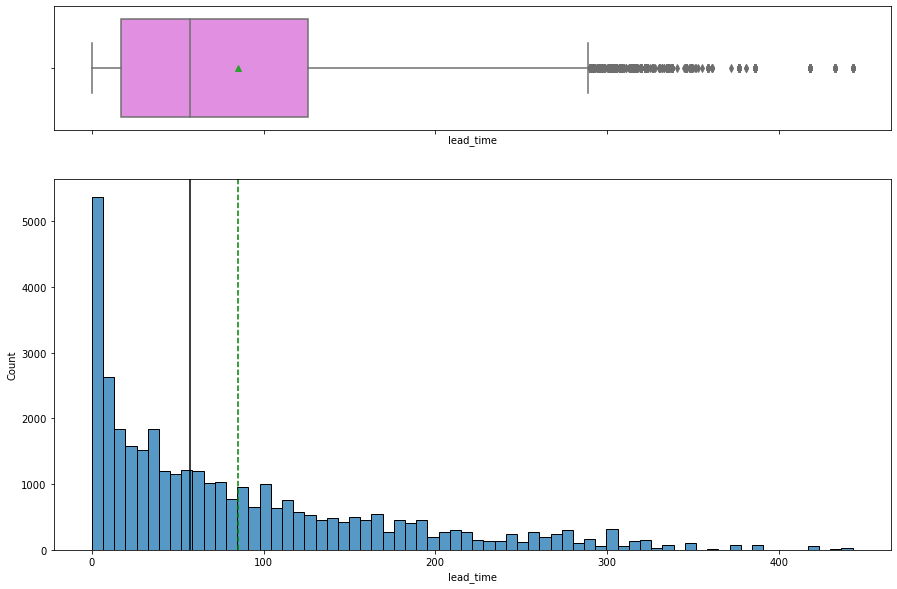

In [131]:
# We use the history histogra_boxploot to graph the lead timehistogram_boxplot(data, "lead_time")

- The Lead Time (waiting time) is slightly loaded to the left, what indicates that you can see bones inWait from one or several rooms.

### Observations on average price per room

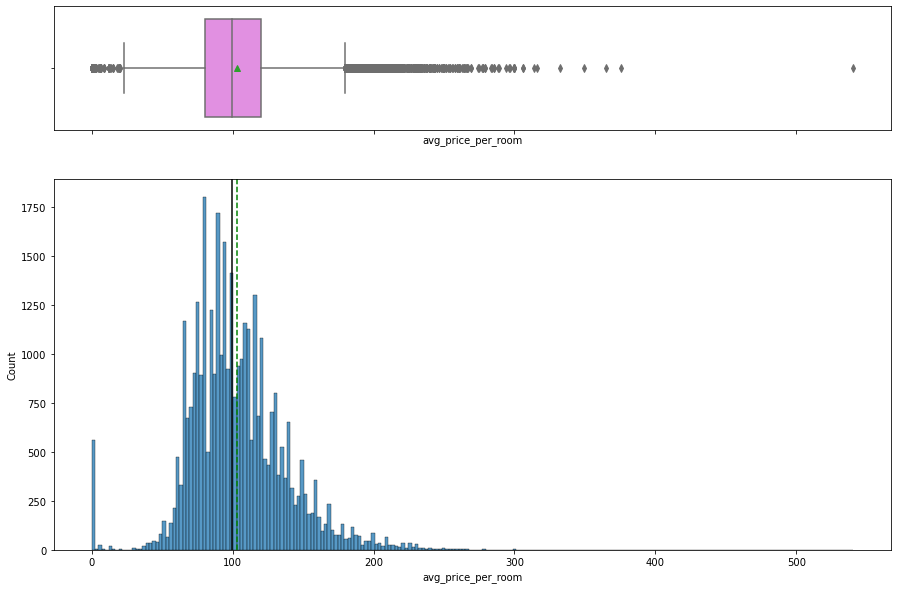

In [132]:
# Using the function histogram_boxploot to graph average price per roomhistogram_boxplot(data,'avg_price_per_room') 

> The distribution of the column of AVG_Price_per_room is almost in its median,close to normal distribution. with a median of 97.

In [133]:
# Now let's see the behavior of Avg_price_per_Oom when it is equal to zerodata[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [134]:
# We count on the type of segment when the AVG_Price_per_room is zerodata.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

> The complementary segment type is greater than online

In [135]:
# Calculation of quantile 25Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculation of quantile 75Q3 = data["avg_price_per_room"].quantile(0.75)  
# We calculate IQRIQR = Q3 - Q1

# Super value calculation whiskerUpper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

> Whisker's value is 179.55

In [136]:
# assigning the atypical values ​​of the value to whiskerdata.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Observations on the number of previous reservations cancellations

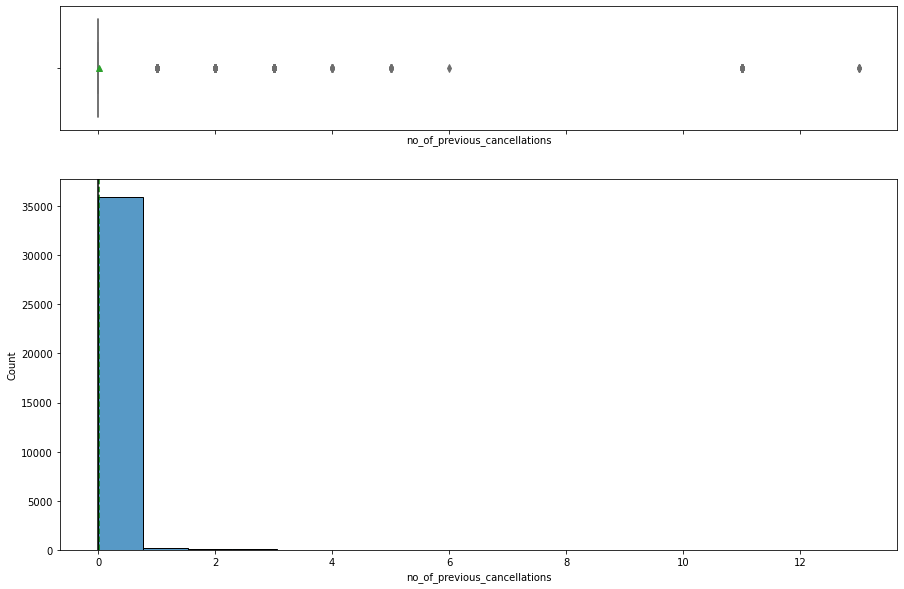

In [137]:
# We use the function histogram_boxploot to graph no_of_previous_cancellationshistogram_boxplot(data,'no_of_previous_cancellations')


> There are almost no previous cancellations, at least it does not give great consideration

### Observations on number of previous not canceled reservations

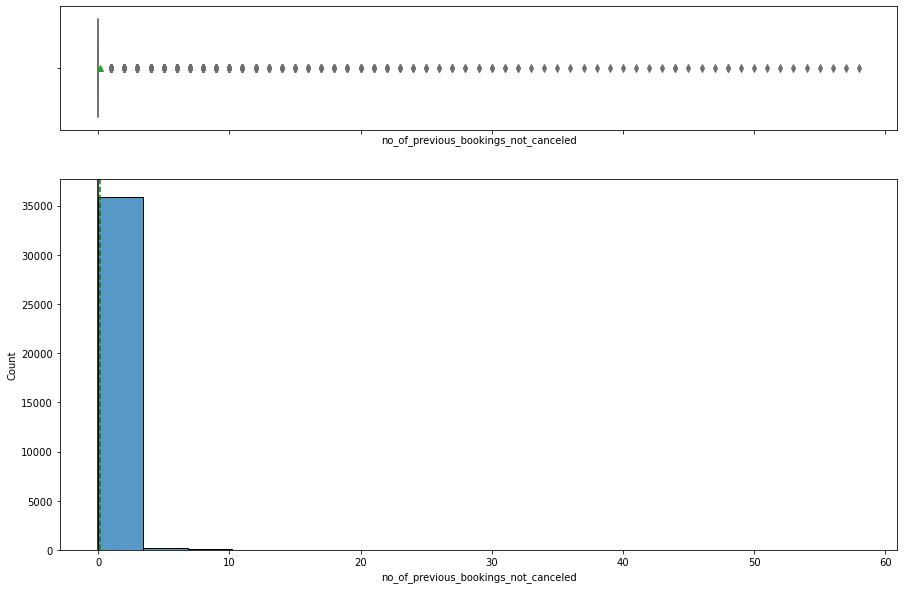

In [138]:
# We use the function histogram_boxploot to graph no of prior Booking not canceledhistogram_boxplot(data,'no_of_previous_bookings_not_canceled') 


> There are almost no reserve cancellations, at least it does not give great consideration

In [139]:
# Function to create barloot diagrams

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # longitud de la columna
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # porcentaje de cada clase de la categoría
        else:
            label = p.get_height()  # recuento de cada nivel de la categoría

        x = p.get_x() + p.get_width() / 2  # ancho del plot
        y = p.get_height()  # largo del plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # anotar el porcentaje

    plt.show()  # se muestra el plot

### Observations about the number of adults

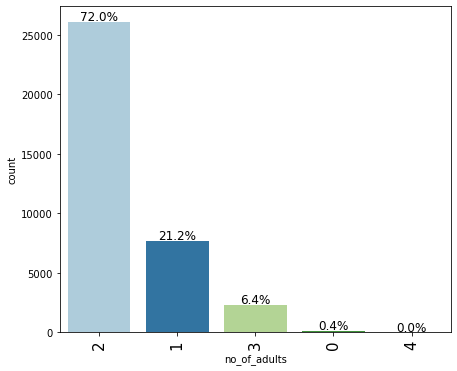

In [140]:
# We use the function defined in the previous step to graph no of adultslabeled_barplot(data, "no_of_adults", perc=True)

> There are more adult percentage in their category 2 than in the rest of their categories

### Observations about the number of children

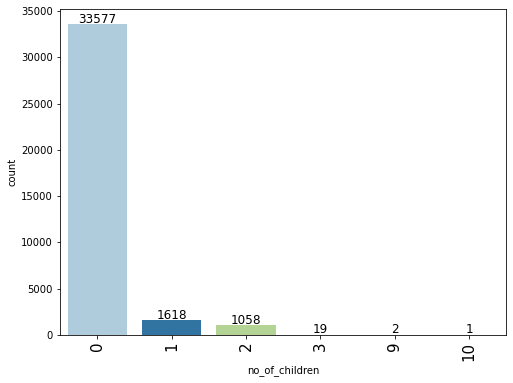

In [141]:
# We use the work Labeled_Barplot to graph no of Childrenlabeled_barplot(data,'no_of_children')  

> There are more percentage of children in their category 0 than in the rest of their categories

In [142]:
# We make an arrangement or matrix with 9, 10 and 3data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

### Observations about the number of nights during the week

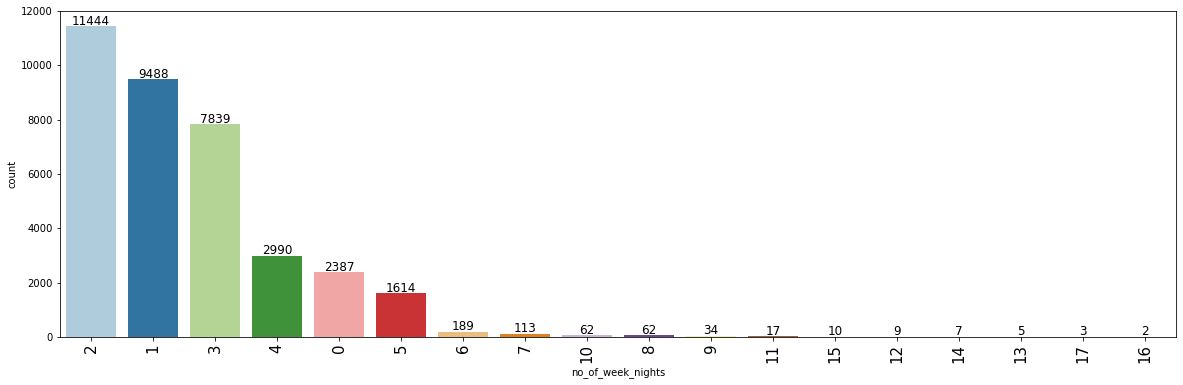

In [143]:
# We use Labeled_Barplot to graph no of Week Nightslabeled_barplot(data,'no_of_week_nights') 

> There is a large number of weeks from week 1 to week 3, going down considerably after week 4.

### Observations on the number of weekend nights

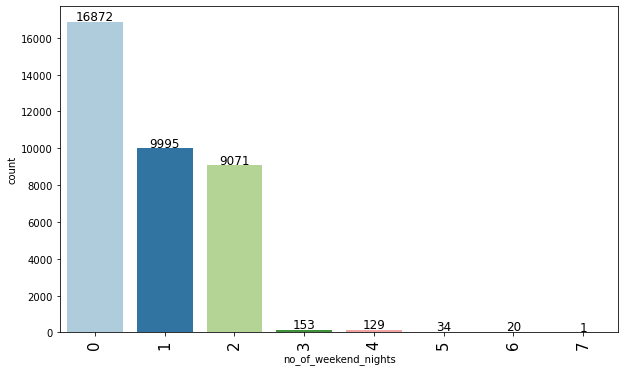

In [144]:
# We use Labeled_Barplot to graph no of Weekend Nightslabeled_barplot(data,'no_of_weekend_nights')  

> There is a large number of weekends from week 0 to week 2, going considerably after week 3.

### Observations on the necessary parking space

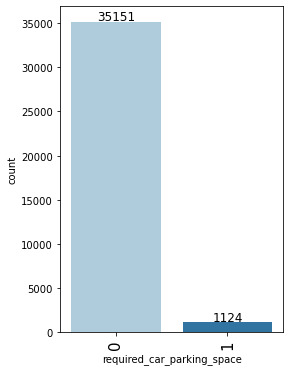

In [145]:
# reuse Laboled_Barplot to graph car parking spacelabeled_barplot(data,'required_car_parking_space') 

> There is space to park cars at the hotel.

### Observations about the type of meal plan

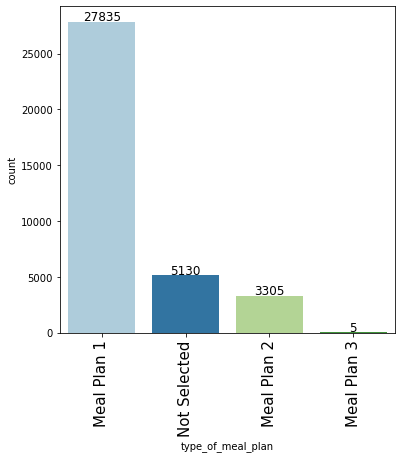

In [146]:
# reusing the work label_bartlo to graph Type of Mean Planlabeled_barplot(data,'type_of_meal_plan')  

> With the number 1 food plan, most of the bones are supplied.

### Observations on reserved room type

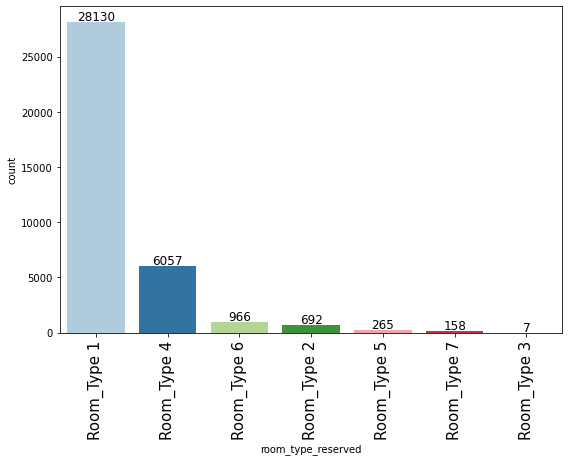

In [147]:
# reusing the label_bartlabeled_barplot(data,'room_type_reserved')  

> With the Typo of Room 1 they are distributed to most of the hosts.

### Observations about the arrival month

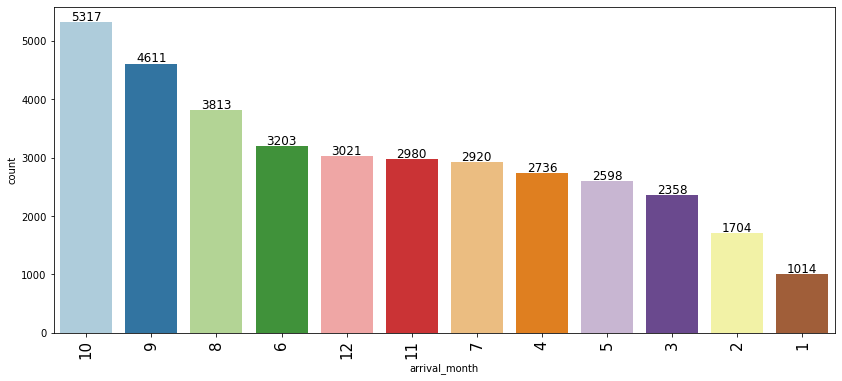

In [148]:
# reusing the Labeled_Barplot function to graph subrival monthlabeled_barplot(data,'arrival_month')  

> The month number 10 (October), is the month where more bones arrive followed by month 9 (September) and month 8 (August)

### Observations on the type of market segment

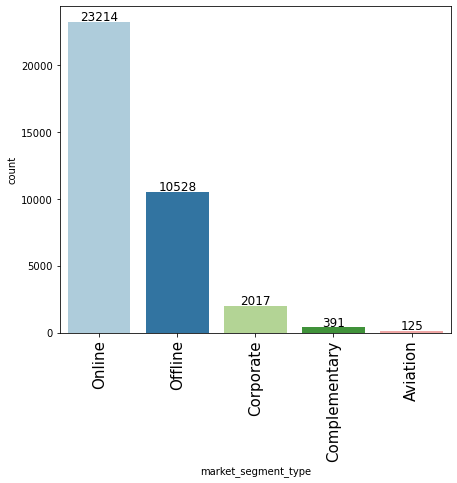

In [149]:
# reusing the work Labeled_Barplot to graph Market Segment Typelabeled_barplot(data,'market_segment_type')  

> The online segment leads the segment followed by offline.

### Observations about the number of special applications

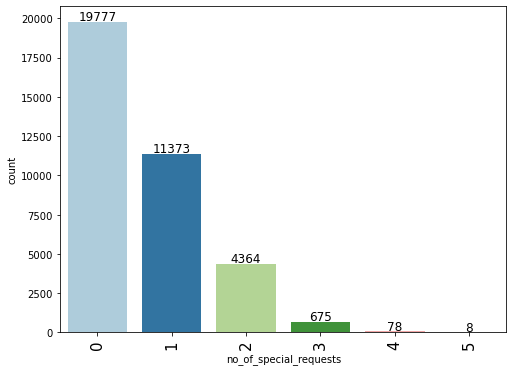

In [150]:
# reuse Laboled_Barplot to graph no of Special Requetslabeled_barplot(data,'no_of_special_requests') 

> Applications number zero is the one that has the most number of requests number 1.

### Observations about the state of the reserve

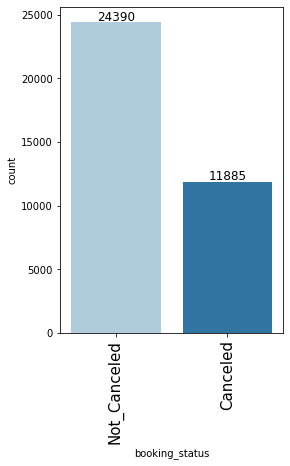

In [151]:
# reusing the work Labeled_Barplot to graph Booking statuslabeled_barplot(data,'booking_status')  

> Non -canceled reservations are higher than canceled, that is always good;Although they are almost half of canceled then not so good is.

In [152]:
# We encode the reservations canceled in 1 and not_Canceled in 0 for a more detailed analysisdata["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate analysis

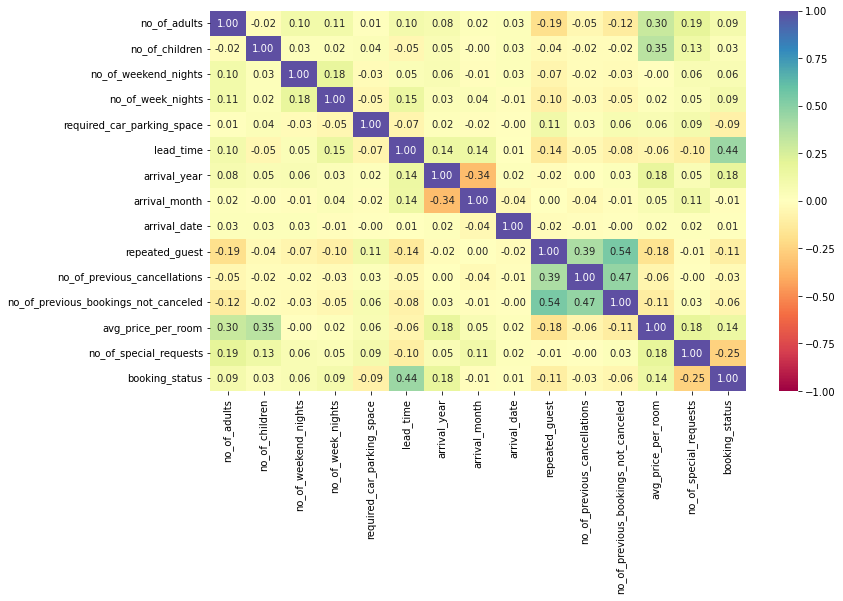

In [153]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- According to the previous graph the variables that has correlation with the repeated quest is not of prior bookings not canceled.

In [154]:
### Function to trace WRT distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [155]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

** Hotel rates are dynamic and change according to the demand and demography of the client. Let's see how prices vary in different market segments **

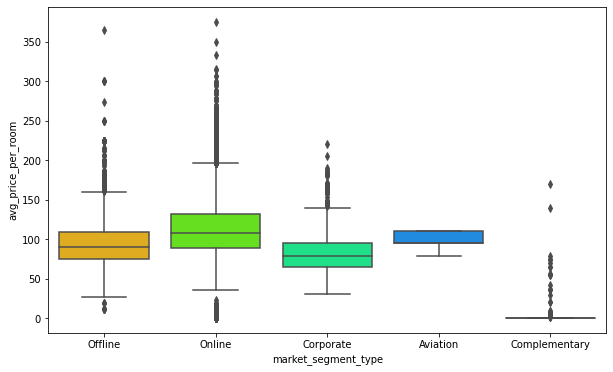

In [156]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- According to the graph, it shows that the rates on its average are higher being online than offline,While corporate rates are the cheapest

** Let's see how the state of the reserve varies in the different market segments. In addition, how the average price per room affects the status of the reserve **

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


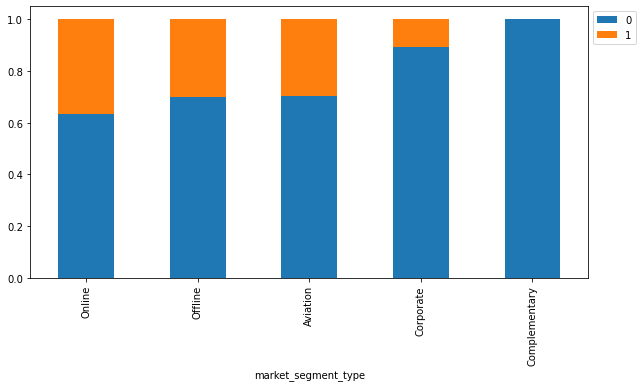

In [157]:
# We reuse the Funion Stacked_Barplot to graph Market Segment Type vs Booking Statusstacked_barplot(data, "market_segment_type", "booking_status")

- Logically, the online segment has more reservations than the others being the least corporate.

** Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations **

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


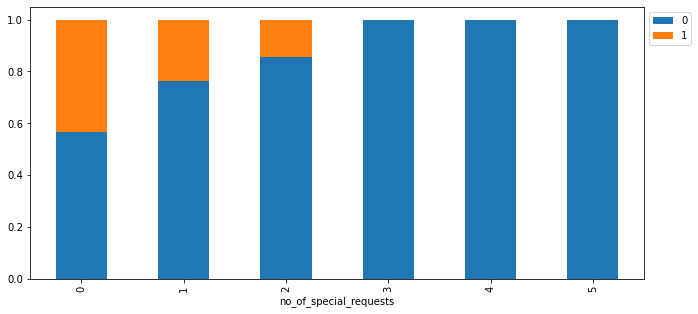

In [158]:
# reusing the function stacked_bartlo to graph no of Special requirements vs Booking statusstacked_barplot(data, 'no_of_special_requests','booking_status')


- The non -special requests has its greatest reservation in the zero number followed by number 1.

** Let's see if the special requests of customers have a room prices **

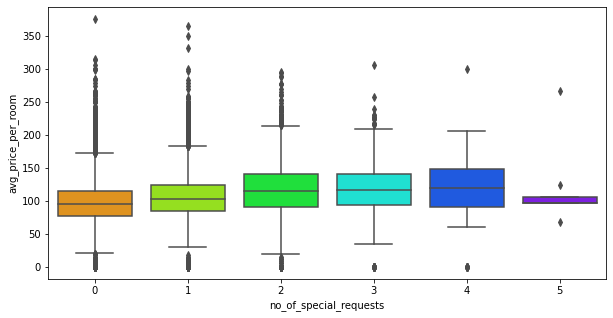

In [159]:
# We graph no of Special Requets vs average price per roomplt.figure(figsize=(10, 5))
sns.boxplot(data=data, x= 'no_of_special_requests', y='avg_price_per_room', palette="gist_rainbow")
plt.show()

- The special applications number has its highest price per day in the numbers 4.3 andwhile number 1 is the least.

** We saw previously that there is a positive correlation between the status of the reserve and the average price per room. Let's analyze it **

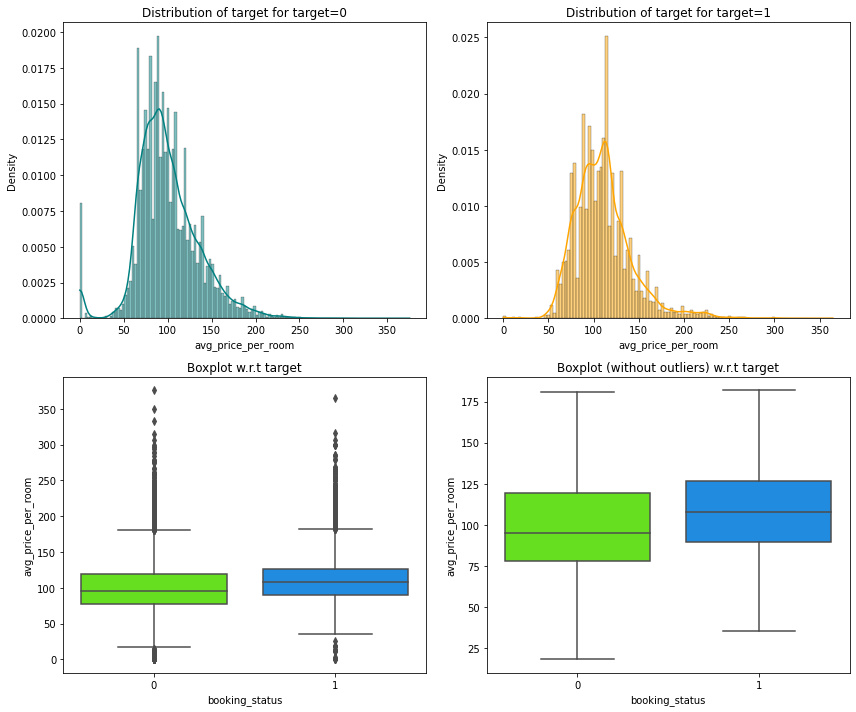

In [160]:
# We use the Distribution_Lot_wrt_target function to graph _price_per_room and booking_statusdistribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

- We observe that the average price per room is greater without outliers (atypical values) considerably.

** There is also a positive correlation between the state of the reserve and the delivery time. Let's analyze it further **

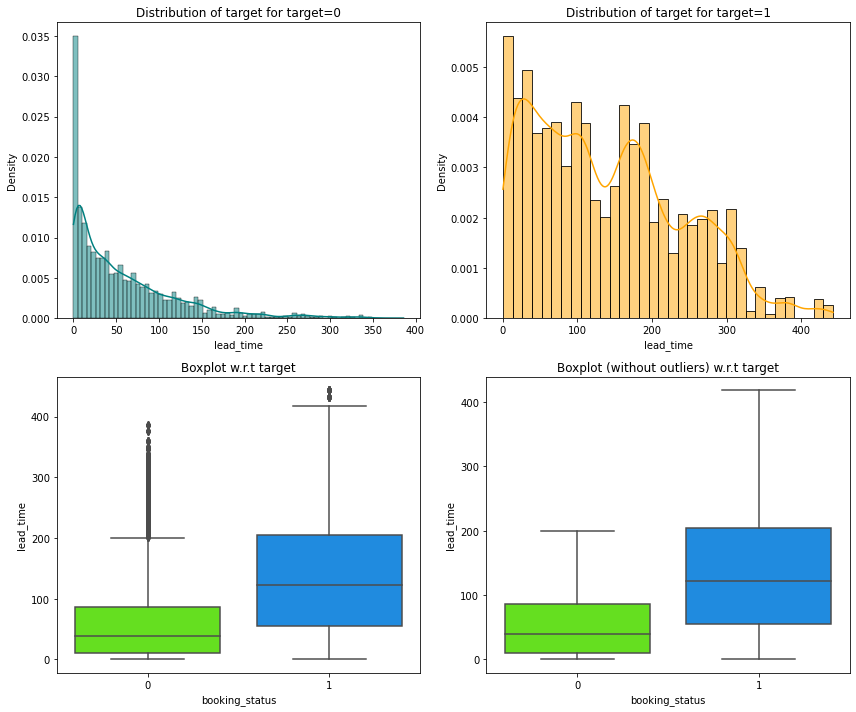

In [161]:
# We use the distribution_ploot_wrt_target to graph lead_time and booking_statusdistribution_plot_wrt_target(data,'lead_time','booking_status') 


- We observe that the reserve status and delivery time is greater without outliers (atypical values).

** Generally people travel with their spouse and children for vacations or other activities. We create a new data frame of customers who traveled with their families and analyze the impact on the state of the reserve. **

In [162]:
# We create a variable named Family_Data where we will condition it by number of children older or equal to zero# and number of adults over 1family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [163]:
# We modify the Family_Data variable adding the number of adults and the number of children.family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


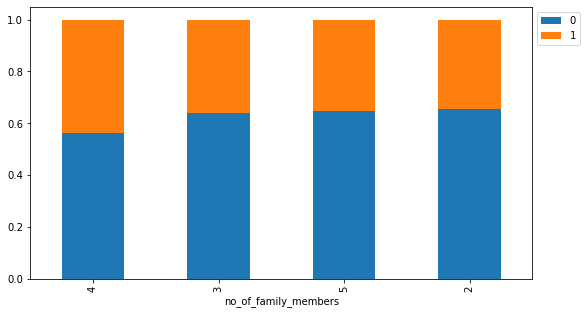

In [164]:
# We reuse the Stacked_bartstacked_barplot(family_data,'no_of_family_members','booking_status') 


- We observe that the reserve status against the number of family members equal to the numbers 2.3 and 5 for number 4It is a bit less but not so much

** Let's do a similar analysis for the client that remains at least one day at the hotel. **

In [165]:
# We create a new variable called Stay_Data Conditioned by the number of nights a week greater than 0 zero# and number of nights on weekend greater to zero.stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [166]:
# We modify the Stay_Data variable, sumondp the number of nights per week and the number of weekends nightsstay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

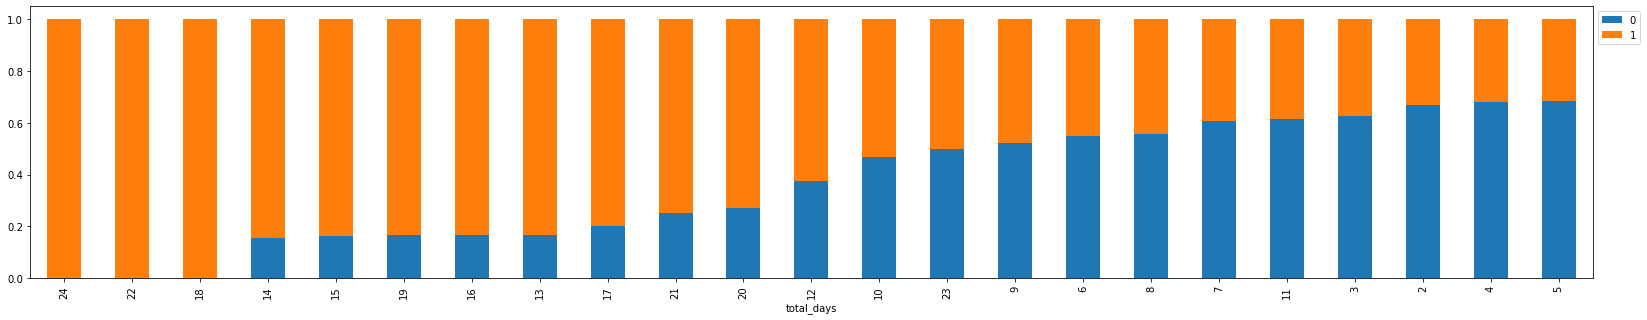

In [167]:
# We reuse the stacke_batplot function to graph total days and booking statusstacked_barplot(stay_data,'total_days','booking_status') 


- Obviously the more days of permanence at the hotel the graph will grow.

** The guests who repeat are the guests who stay at the hotel frequently and are important for the brand's value. Let's look at what percentage of repeaters cancels cancel? **

booking_status      0     1    All
repeated_guest                    
All             10979  6115  17094
0               10812  6108  16920
1                 167     7    174
------------------------------------------------------------------------------------------------------------------------


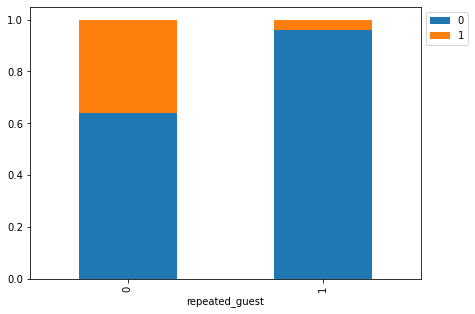

In [168]:
# We reuse the function stackef_bartlo to graph repeated_guest and booking_statusstacked_barplot(stay_data,'repeated_guest','booking_status') 


- There are more bones that repeat that those who cancel

** Let's see what are the months of greatest activity at the hotel. **

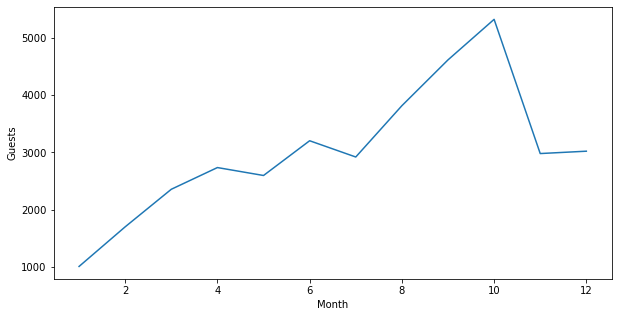

In [169]:
# We create a variable called months_data and group by Arrival_month and Booking Status to bring their countingmonthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# We create a data frame and customer counting in each monthmonthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# We graph the different monthsplt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

- It is observed that bones arrive more in month 10 (October) being the first months of the year(January, Fenrero, March and April), where less bones arrive at the hotel.

** Let's look at the percentage of reservations canceled in each month. **

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


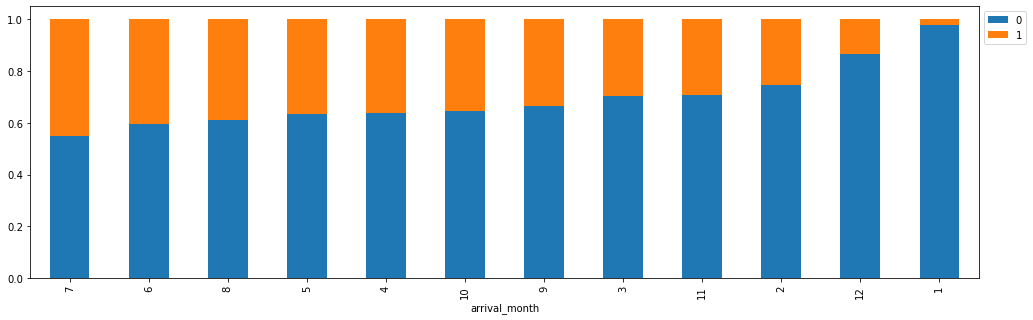

In [170]:
# We reuse the stacked_barplo fumcion to graph arrival month and booking statusstacked_barplot(data,'arrival_month','booking_status') 


- It is observed that bones arrive more in month 10 (October) being the first months of the year(January, Fenrero, March and April), where less bones arrive at the hotel.

** As hotel room prices are dynamic, let's see how prices vary in different months **

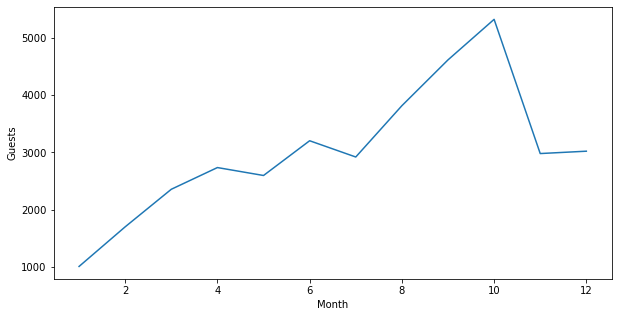

In [171]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests") 
plt.show()

### Checking of atypical values
- Let's check if there are atypical values ​​in the data.

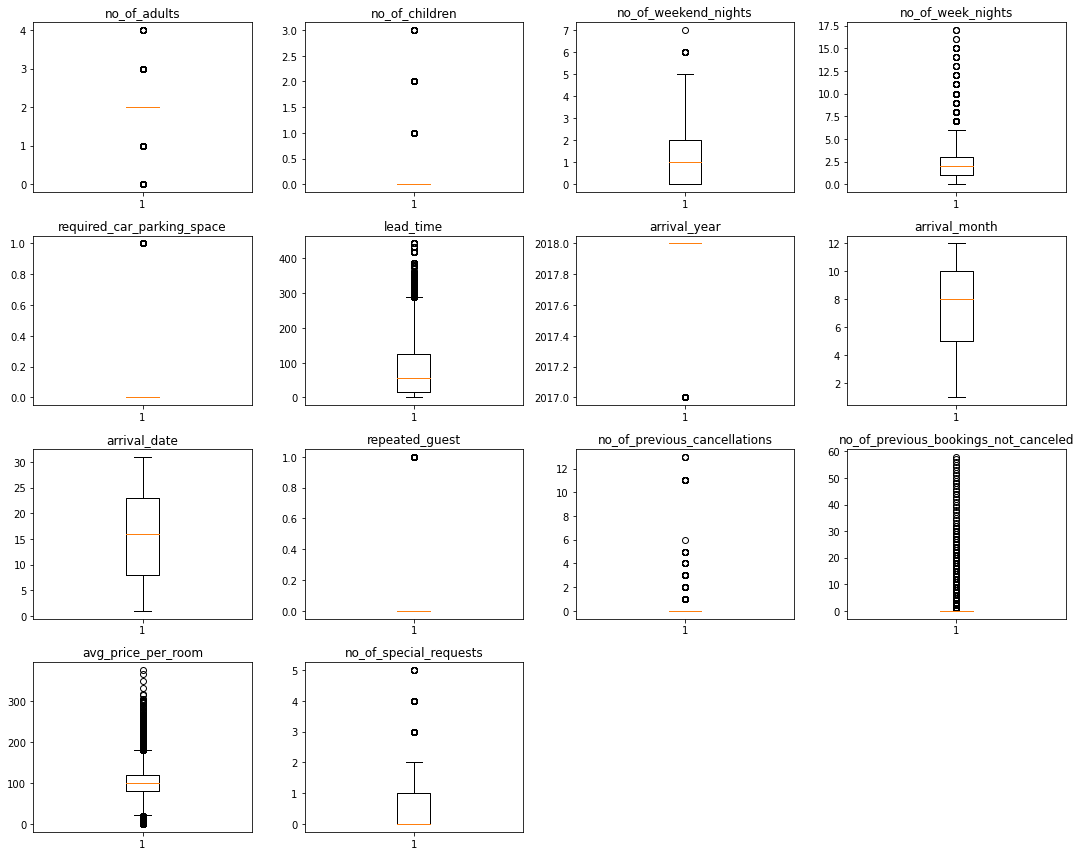

In [172]:
# detection of atypical values ​​with boxplootnumeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# discarding booking_statusnumeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- It is observed that without atypical values ​​the graphs vary in all its columns or fields- The price per fourth is preserved, the average nights on weekends is 1, the average of the month of theArrival of the bones is in the month 8 (August).

## Model construction

### Model evaluation criteria
### The model can make incorrect predictions such as:
1. Predict that a client will not cancel his reservation, but in reality, the client will cancel his reservation.2. Predict that a client will cancel his reservation but, in reality, the client will not cancel his reservation.
### What is the most important case?* Both cases are important:* If we foresee that a reservation will not be canceled and the reservation is canceled, the hotel will lose resources and will have to take care of the additional costs of the distribution channels.
* If we predict that a reservation will be canceled and the reservation is not canceled, it is possible that the hotel cannot provide satisfactory services to the customer assuming this reservation will be canceled. This could damage the value of the brand.


### How to reduce losses?* The hotel would like to maximize the "score F1", the higher the F1 score, the greater the possibilities of minimizing false negatives and false positives.

#### First, we believe functions to calculate different metrics and confusion matrices so that we do not have to use the same code repeatedly for each model.* The model_performance_classification_statsmodels will be used to verify the performance of the model of the models.* The confusion_matrix_statsmodels will be used to trace the confusion matrix.

In [173]:
# defining the function to calculate different metrics to verify the performance of a classification model# built using statsmodelsdef model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

# checking what probabilities are greater than the threshold    pred_temp = model.predict(predictors) > threshold
# Rounding the above values ​​to obtain classes    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # para calcular Exactitud
    recall = recall_score(target, pred)  # para calcular Recall
    precision = precision_score(target, pred)  # para calcular Precision
    f1 = f1_score(target, pred)  # para calcular F1-score

# Creating a metric data    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [174]:
# defining a function to draw the matrix_confusion of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistics regression (with statistical models library)

#### Modeling data preparation (logistics regression)

- We want to predict what reservations will be canceled.- Before proceeding to build a model, we will have to encode categorical characteristics.- We will divide the data into training and test to evaluate the model we build in training data.

In [175]:
# We remove the Booking_Status field of the data variableX = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# We add the constant xX = sm.add_constant(X) 

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)   ## Complete the code to create dummies for X 

# We divide the data into training and test setsX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [176]:
print("Forma del conjunto de entrenamiento : ", X_train.shape)
print("Forma del conjunto de prueba : ", X_test.shape)
print("Porcentaje de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("Porcentaje de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Forma del conjunto de entrenamiento :  (25392, 28)
Forma del conjunto de prueba :  (10883, 28)
Porcentaje de clases en el conjunto de entrenamiento:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Porcentaje de clases en el conjunto de prueba:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


#### Construction of the logistics regression model

In [177]:
# Logistics regression model adjustmentlogit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()  
print(lg.summary())

         Current function value: 0.425090
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.3292
Time:                        18:18:56   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653

In [178]:
print("Rendimiento del entrenamiento:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Rendimiento del entrenamiento:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


#### multicolinerality

In [179]:
# We define a function to verify vifdef checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

# calculating vif for each feature    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [180]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


#### Elimination of high value variables P
- We will eliminate the predictor variables that have a value of P greater than 0.05, since they do not have a significant impact on the target variable.- But sometimes P values ​​change after eliminating a variable. Therefore, we will not eliminate all the variables at the same time.- Instead, we will do the following:- We will create a model, verify the P values ​​of the variables and release the column with the highest P value.- We will create a new model without the eliminated function, we will verify the P values ​​of the variables and eliminate the column with the highest P value.- We will repeat the two previous steps until there are columns with value p> 0.05.
The previous process can also be done manually selecting a variable while having a high P value, discarding it and building a model again. But that can be a bit tedious and using a loop will be more efficient.

In [ ]:
# initial column listcols = X_train.columns.tolist()

# An initial maximum P value is establishedmax_p_value = 1

while len(cols) > 0:
# defining the training set    x_train_aux = X_train[cols]

# adjusting the model    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

# obtaining the values ​​P and the maximum P value    p_values = model.pvalues
    max_p_value = max(p_values)

# Name of the variable with maximum P value    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [182]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [183]:
# Code to train logistics regression at x_train1 and y_trainlogit1 = sm.Logit(y_train, X_train1.astype(float)) 
## Code to adjust to logistics regressionlg1 = logit1.fit() 
print(lg1.summary()) 

Optimization terminated successfully.
         Current function value: 0.425731
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.3282
Time:                        18:19:25   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600    

In [184]:
print("Rendimiento del entrenamiento:")
model_performance_classification_statsmodels(lg1,X_train1, y_train)


Rendimiento del entrenamiento:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


### converting coefficients into probabilities* The coefficients of the logistics regression model are in terms of Log (ODD), to find the probabilities we have to take the exponential of the coefficients.*Therefore, ** Odds = exp (b) ***The percentage change in the quotas is given as ** Odds = (exp (b) - 1)*100 **

In [185]:
# Convertieindo coefficients to probabilitiesodds = np.exp(lg1.params)

# finding the percentage changeperc_change_odds = (np.exp(lg1.params) - 1) * 100

# Eliminating the limit of the number of columns to showpd.set_option("display.max_columns", None)

# Adding the probabilities to dataframepd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


#### Checking model performance in the training set

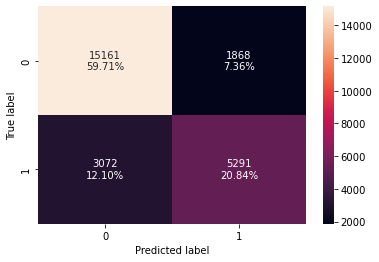

In [186]:
# Creating confusion matrixconfusion_matrix_statsmodels(lg1, X_train1, y_train)

In [187]:
print("Rendimiento del entrenamiento:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Rendimiento del entrenamiento:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


#### Roc-Auc* Roc-Auc in the training set

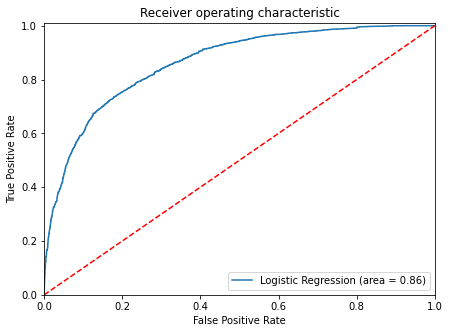

In [188]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Improvement of model performance

* Let's see if the recovery score can be improved even more changing the threshold of the model using the AUC-ROC curve.

#### Optimal threshold using the AUC-ROC curve

In [189]:
# Optimal threshold according to the AUC-ROC curve# The optimal cut would be where TPR is high and FPR is lowfpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558707844


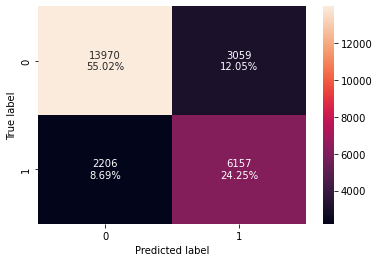

In [190]:
# Creating confusion matrixconfusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)


In [191]:
# Checking the model performance for this model.log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Rendimiento del entrenamiento:")
log_reg_model_train_perf_threshold_auc_roc

Rendimiento del entrenamiento:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


#### We use the precision-recall curve and see if we can find a better threshold

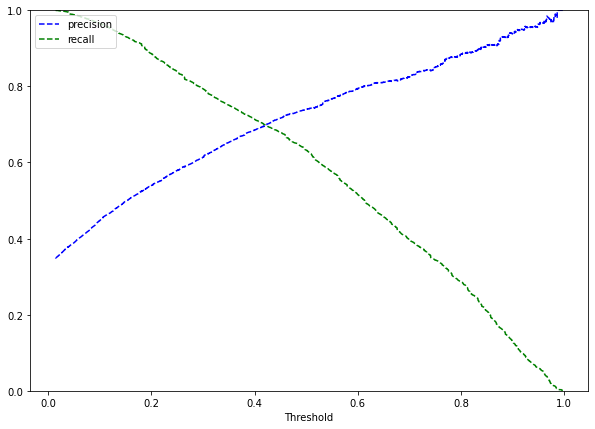

In [192]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [193]:
# We establish the thresholdoptimal_threshold_curve = 0.42

#### Checking model performance in the training set

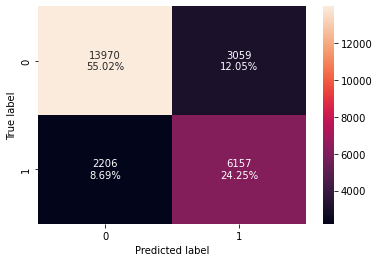

In [194]:
# Creating confusion matrixconfusion_matrix_statsmodels(
    lg1,X_train1, y_train, threshold=optimal_threshold_auc_roc 
) 

In [195]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve)
print("Rendimiento del entrenamiento:")
log_reg_model_train_perf_threshold_curve

Rendimiento del entrenamiento:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


#### Let's check the performance in the test set

** Using model with predetermined threshold **

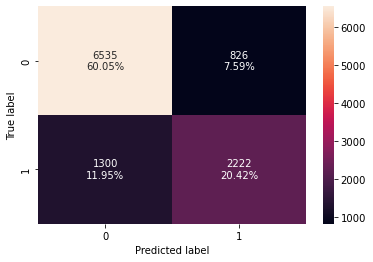

In [196]:
# Creating the Confucion Matrixconfusion_matrix_statsmodels(lg1,X_test1, y_test) ## Complete the code to create confusion matrix for X_test1 and y_test

In [197]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test1, y_test) 
print("Rendimiento del entrenamiento:")
log_reg_model_test_perf 

Rendimiento del entrenamiento:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


* ROC curve in the testing set

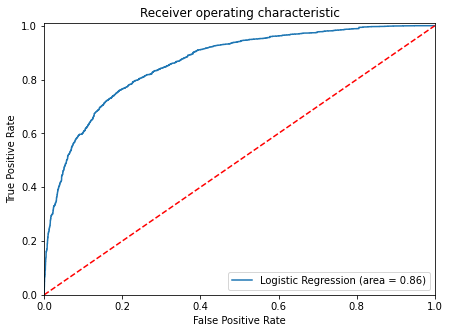

In [198]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

** Using threshold model = 0.37 **

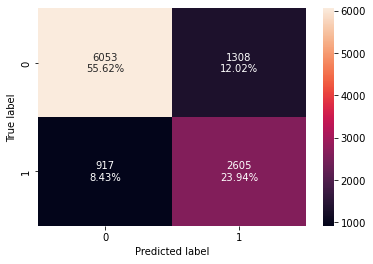

In [199]:
# Creating the Confucion Matrixconfusion_matrix_statsmodels(lg1,X_test1, y_test, threshold=optimal_threshold_auc_roc) 


In [200]:
# Checking model performance for this modellog_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Prueba de rendimiento:")
log_reg_model_test_perf_threshold_auc_roc

Prueba de rendimiento:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


** Using threshold model = 0.42 **

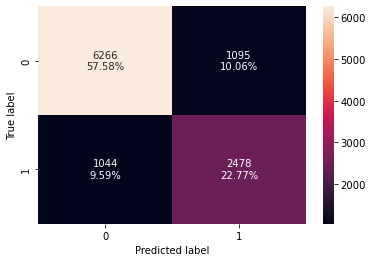

In [201]:
# Creating Confucion Matrixconfusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve) 


In [202]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Prueba de rendimiento:")
log_reg_model_test_perf_threshold_curve

Prueba de rendimiento:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


#### Summary of model performance

In [203]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Comparación de rendimiento de entrenamiento:")
models_train_comp_df

Comparación de rendimiento de entrenamiento:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


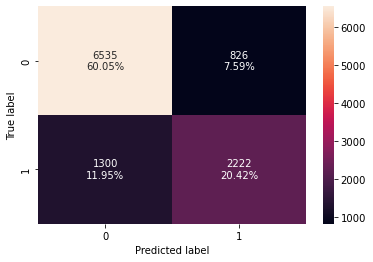

In [204]:
# Test performance comparisonconfusion_matrix_statsmodels(lg1, X_test1, y_test) 

### Decision tree

#### Data preparation for modeling (decision tree)

- We want to predict what reservations will be canceled.- Before proceeding to build a model, we will have to encode categorical characteristics.- We will divide the data into training and test to be able to evaluate the model we build in the train data.

In [205]:
# We eliminate the Booking_Status column of the data variableX = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) 

# We divide the data into training and test setsX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [206]:
print("Forma del conjunto de entrenamiento : ", X_train.shape)
print("Forma del conjunto de prueba: ", X_test.shape)
print("Porcentaje de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("Porcentaje de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Forma del conjunto de entrenamiento :  (25392, 27)
Forma del conjunto de prueba:  (10883, 27)
Porcentaje de clases en el conjunto de entrenamiento:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Porcentaje de clases en el conjunto de prueba:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


#### First, we believe functions to calculate different metrics and confusion matrices so that we do not have to use the same code repeatedly for each model.* The model_performance_classification_skleran will be used to verify the performance of the model of the models.* The confusion_matrix_skleran function will be used to trace the confusion matrix.

In [207]:
# We define the function to calculate different metrics to verify the performance# of a classification model created with Sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

# we predict using independent variables    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # para calcular Accuracy
    recall = recall_score(target, pred)  # para calcular Recall
    precision = precision_score(target, pred)  # para calcular Precision
    f1 = f1_score(target, pred)  # para calcular F1-score

# We create a metric data    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [208]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Construction decision tree model

In [209]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

#### Checking model performance in the training set

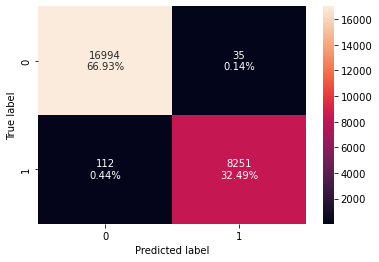

In [210]:
# We create training confusion matrixconfusion_matrix_sklearn(model,X_train, y_train) 

In [211]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


#### Checking model performance in the test set

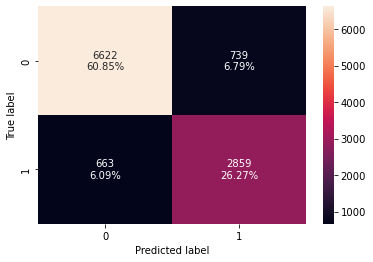

In [212]:
# We create confusion matrix for test dataconfusion_matrix_sklearn(model, X_test, y_test) 

In [213]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


** Before pruning the tree, let's review the important characteristics. **

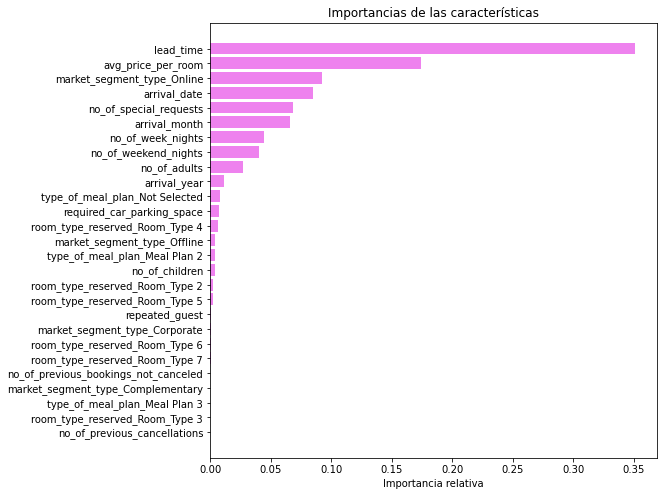

In [214]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Importancias de las características")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importancia relativa")
plt.show()

#### Poda of the tree

** PRE-PODA **

In [215]:
# Choose the type of classifier.estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Parameters to chooseparameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of score used to compare parameter combinationsacc_scorer = make_scorer(f1_score)

# Execute the grid searchgrid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Establish the CLF in the best combination of parameters.estimator = grid_obj.best_estimator_

# Adjust the best algorithm to the data.estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Performance check in the training set

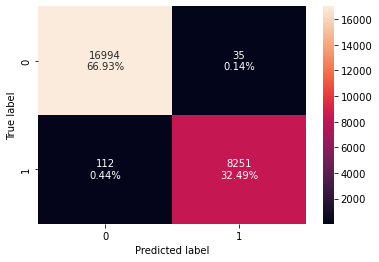

In [216]:
# We create the confusion matrix for training dataconfusion_matrix_sklearn(model, X_train, y_train) 

In [217]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) 
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


#### Checking on the test set

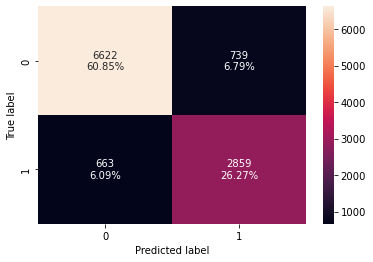

In [218]:
# We create the confusion matrix for test dataconfusion_matrix_sklearn(model, X_test, y_test) 


In [219]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(model, X_test, y_test) 
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


#### Decision tree display

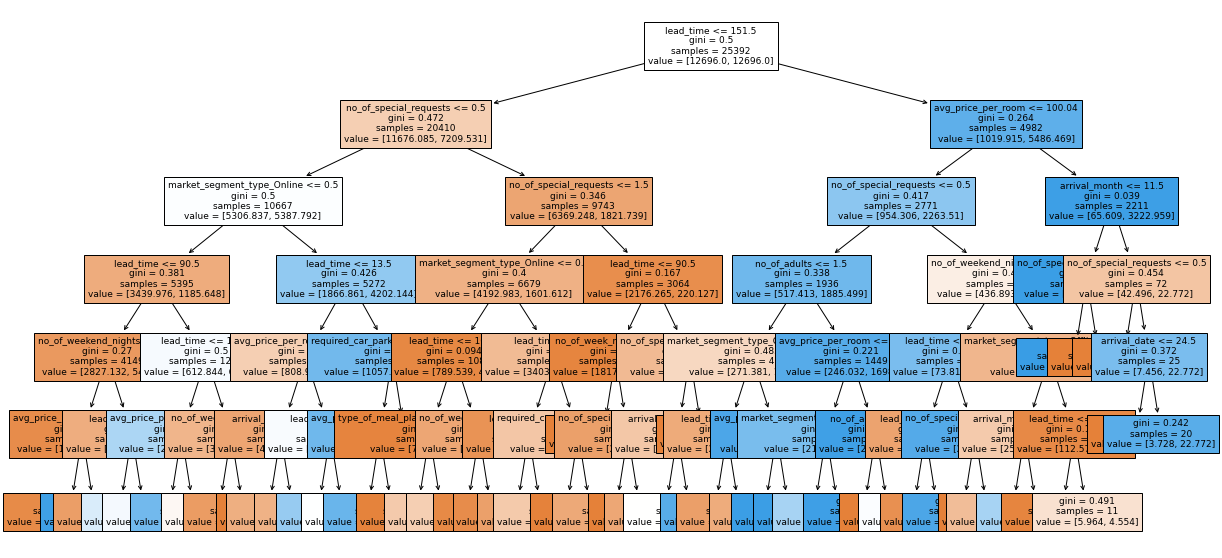

In [220]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# The following code will add arrows to the division of the decision tree if they are missingfor o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [221]:
# Text report showing the rules of a decision treeprint(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

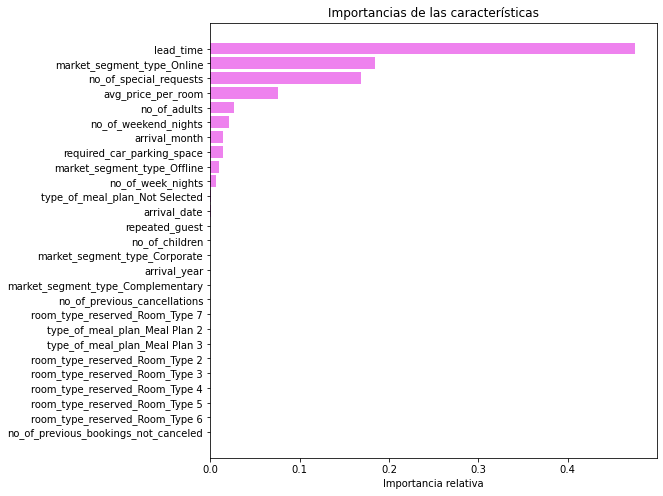

In [222]:
# Importance of the characteristics in the construction of the tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Importancias de las características")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importancia relativa")
plt.show()

** Reduction of cost complexity **

In [223]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [224]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


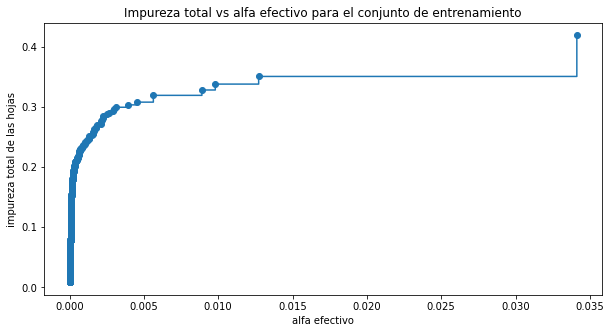

In [225]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alfa efectivo")
ax.set_ylabel("impureza total de las hojas")
ax.set_title("Impureza total vs alfa efectivo para el conjunto de entrenamiento")
plt.show()

Next, we train a decision tree using effective alfas. The last valueIn `` ccp_alphas`` it is the alpha value that the entire tree prune,Leaving the tree, `` Clfs [-1] `, with a node.

In [227]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) 
    clfs.append(clf)
print(
    "El número de nodos en el último árbol es: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

El número de nodos en el último árbol es: 1 with ccp_alpha: 0.0811791438913696


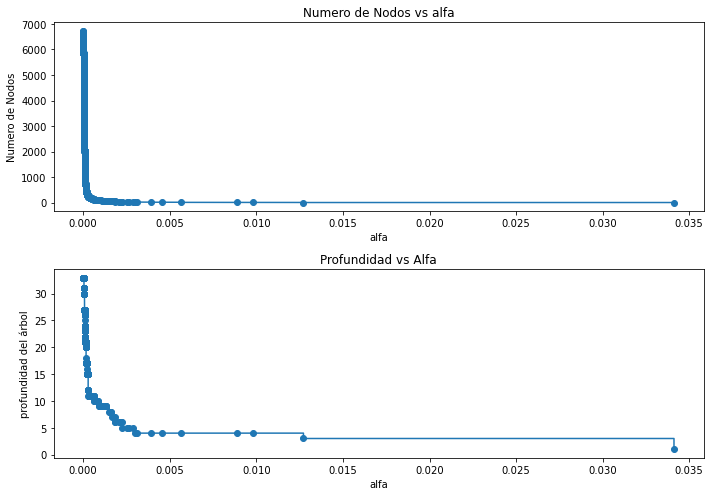

In [228]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alfa")
ax[0].set_ylabel("Numero de Nodos")
ax[0].set_title("Numero de Nodos vs alfa")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alfa")
ax[1].set_ylabel("profundidad del árbol")
ax[1].set_title("Profundidad vs Alfa")
fig.tight_layout()

#### F1 score vs alpha for training and test sets

In [229]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

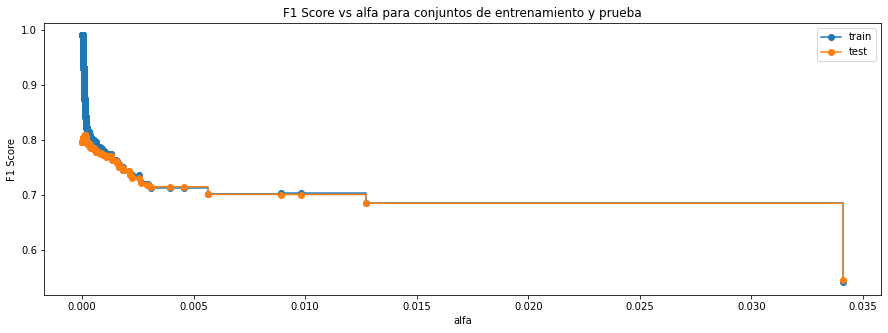

In [230]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alfa")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alfa para conjuntos de entrenamiento y prueba")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [231]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


#### Performance check in the training set

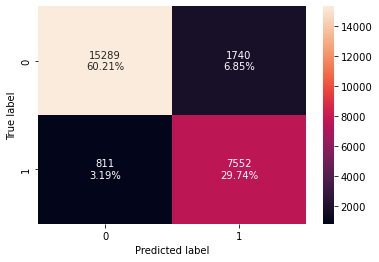

In [232]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [233]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


#### Checking on the test set

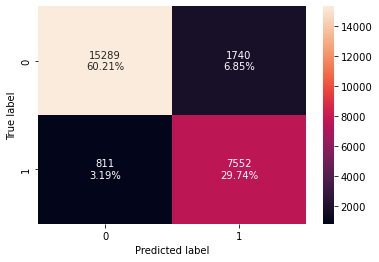

In [234]:
# We create the confusion matrix for test dataconfusion_matrix_sklearn(best_model, X_train, y_train)
 

In [235]:
decision_tree_post_test = model_performance_classification_sklearn(best_model,X_test, y_test)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


- With later pruning, we are obtaining a bad and generalized model performance both in the training set and in the test.- The recall has dropped more.

Plt.Figure (Figsize = (20, 10))
out = tree.ploot_tree (Best_Model,feature_names = feature_names,Filled = True,fontsize = 9,node_ids = false,class_names = none,)
for or in out:Arrow = O.arrow_pchif arrow is not none:Arrow.set_edGecolor ("Black")Arrow.set_linewidth (1)Plt.show ()


In [237]:
# Text report showing the rules of a decision treeprint(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

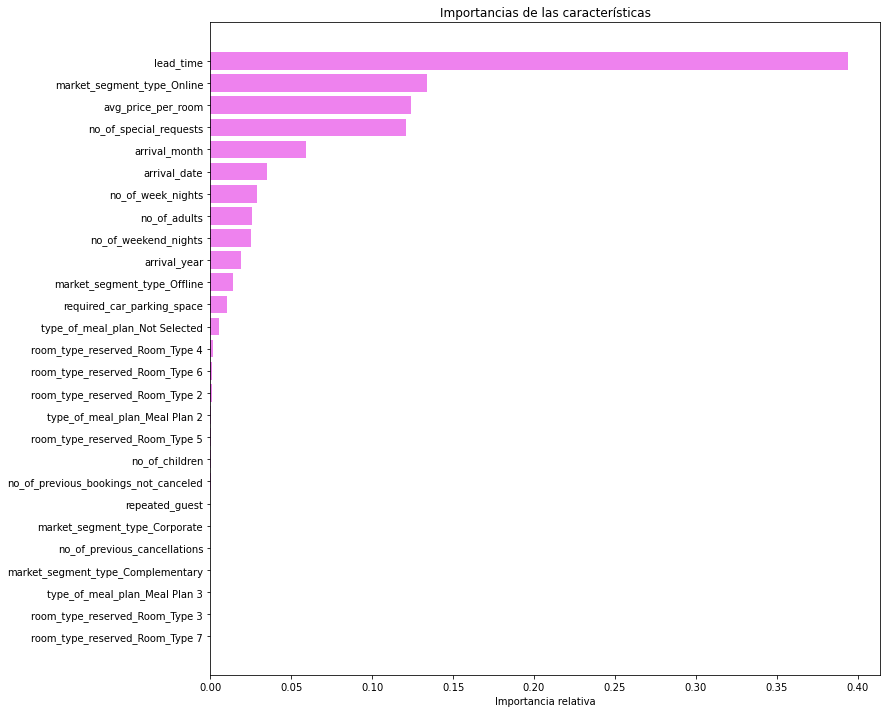

In [238]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Importancias de las características")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importancia relativa")
plt.show()

#### Comparison of decision tree models

In [239]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Comparación de rendimiento de entrenamiento:")
models_train_comp_df

Comparación de rendimiento de entrenamiento:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.99421,0.89954
Recall,0.98661,0.98661,0.90303
Precision,0.99578,0.99578,0.81274
F1,0.99117,0.99117,0.85551


In [240]:
# Test performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Comparación de rendimiento del conjunto de prueba:")
models_train_comp_df


Comparación de rendimiento del conjunto de prueba:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.87118,0.86879
Recall,0.81175,0.81175,0.85576
Precision,0.79461,0.79461,0.76614
F1,0.80309,0.80309,0.80848


### Commercial recommendations

- Lead Time, Market Segment Type Online, Avg Price Per Room, No Special of Requets, Arrive Month and Arrive DayThey are the most important variables to determine. The more pruning the model performance is lowered.- Among the first 4 months of each year, the demand for rooms decreases considerably accommodation of the last 4months of the year that the demand for rooms and bones rises considerably. As a recommendation, you can verifyIf in the month of October that is the month 10 where it has its highest peak in demand for rooms and bony, as well asFamily farm.- Huespes or families that are frequent clients, have to be the focus of the target always.- The criteria to win more bones must be attacked by the online market segment, since it is where they are recordedmore huepedes throughout the year, the Internet being the point of marketing to pull more clientele.- If the client or bones are of legal age has much more positions that they are frequent customers, this beingAnother focus to get more clientele.- Although you do not have in the data set provided by Inn hotels, it would be a very good idea, to have a column or fieldAdditional, of comments or suggestions for customers or hosts of the Inn hotels, to have more point of referenceand improves especially in low tims.